In [1]:
import os
os.chdir("/Users/xinhaoliu/Desktop/Research/Code/paste")
import scanpy as sc
import numpy as np
from src.paste.fractional_align import partial_pairwise_align
from src.paste.visualization import partial_stack_slices_pairwise
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

%load_ext autoreload
%autoreload 2

In [23]:
from experiments.helper import compute_alignment_ari
from src.paste.PASTE import pairwise_align

In [2]:
layer_to_color_map = {'Layer{0}'.format(i+1):sns.color_palette()[i] for i in range(6)}
layer_to_color_map['WM'] = sns.color_palette()[6]
def plot_slices_overlap(slices, layer_to_color_map=layer_to_color_map):
    #plt.figure(figsize=(10,15))
    plt.figure(figsize=(10,10))
    for i in range(len(slices)):
        adata = slices[i]
        colors = list(adata.obs['layer_guess_reordered'].astype('str').map(layer_to_color_map))
        plt.scatter(adata.obsm['spatial'][:,0],adata.obsm['spatial'][:,1],linewidth=0,s=100, marker=".",color=colors)
    plt.legend(handles=[mpatches.Patch(color=layer_to_color_map[adata.obs['layer_guess_reordered'].cat.categories[i]], label=adata.obs['layer_guess_reordered'].cat.categories[i]) for i in range(len(adata.obs['layer_guess_reordered'].cat.categories))],fontsize=10,title='Cortex layer',title_fontsize=15,bbox_to_anchor=(1, 1))
    plt.gca().invert_yaxis()
    plt.axis('off')
    plt.show()

In [23]:
sliceA_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/single_resample/pca/151674_overlap0.5_dropFalse_rotateFalse_resampleTrue_delta0.1_row0_col0.h5ad'
sliceB_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/single_resample/pca/151674_overlap0.5_dropFalse_rotateFalse_resampleTrue_delta0.1_row1_col0.h5ad'

sliceA = sc.read_h5ad(sliceA_filename)
sliceB = sc.read_h5ad(sliceB_filename)
pi, log = partial_pairwise_align(sliceA, sliceB, alpha=0.1, m=0.5, armijo=False, dissimilarity='glmpca', norm=True, return_obj=True, verbose=True)
print("Total mass transported is: " + str(np.sum(pi)))

Starting GLM-PCA...
Iteration: 0 | deviance=9.6993E+6
Iteration: 1 | deviance=9.6991E+6
Iteration: 2 | deviance=8.7996E+6
Iteration: 3 | deviance=8.4662E+6
Iteration: 4 | deviance=8.3358E+6
Iteration: 5 | deviance=8.2748E+6
Iteration: 6 | deviance=8.2396E+6
Iteration: 7 | deviance=8.2158E+6
Iteration: 8 | deviance=8.1983E+6
Iteration: 9 | deviance=8.1849E+6
Iteration: 10 | deviance=8.1743E+6
Iteration: 11 | deviance=8.1656E+6
Iteration: 12 | deviance=8.1584E+6
Iteration: 13 | deviance=8.1524E+6
Iteration: 14 | deviance=8.1472E+6
Iteration: 15 | deviance=8.1428E+6
Iteration: 16 | deviance=8.1390E+6
Iteration: 17 | deviance=8.1356E+6
Iteration: 18 | deviance=8.1327E+6
Iteration: 19 | deviance=8.1300E+6
Iteration: 20 | deviance=8.1277E+6
Iteration: 21 | deviance=8.1256E+6
Iteration: 22 | deviance=8.1238E+6
Iteration: 23 | deviance=8.1221E+6
Iteration: 24 | deviance=8.1206E+6
Iteration: 25 | deviance=8.1192E+6
Iteration: 26 | deviance=8.1179E+6
Iteration: 27 | deviance=8.1168E+6
Iteration:

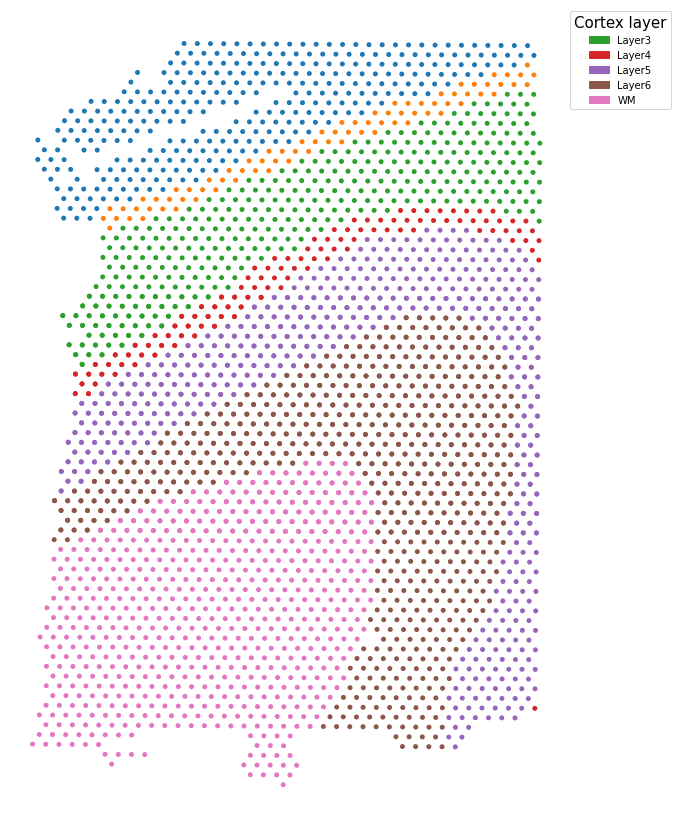

In [24]:
new_slices = partial_stack_slices_pairwise([sliceA, sliceB], [pi])
plot_slices_overlap(new_slices, layer_to_color_map)

In [32]:
"""
Real slices 0.5 overlap
"""
sliceA_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/151673/151673_overlap0.5_dropFalse_rotateFalse_resampleFalse_delta0.0_row0_col0.h5ad'
sliceB_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/151674/151674_overlap0.5_dropFalse_rotateFalse_resampleFalse_delta0.0_row1_col0.h5ad'

sliceA = sc.read_h5ad(sliceA_filename)
sliceB = sc.read_h5ad(sliceB_filename)
pi, log = partial_pairwise_align(sliceA, sliceB, alpha=0.1, m=0.5, armijo=False, dissimilarity='glmpca', norm=True, return_obj=True, verbose=True)
print("Total mass transported is: " + str(np.sum(pi)))

Starting GLM-PCA...
Iteration: 0 | deviance=8.0549E+6
Iteration: 1 | deviance=8.0546E+6
Iteration: 2 | deviance=7.0808E+6
Iteration: 3 | deviance=6.8294E+6
Iteration: 4 | deviance=6.7305E+6
Iteration: 5 | deviance=6.6841E+6
Iteration: 6 | deviance=6.6580E+6
Iteration: 7 | deviance=6.6414E+6
Iteration: 8 | deviance=6.6297E+6
Iteration: 9 | deviance=6.6211E+6
Iteration: 10 | deviance=6.6144E+6
Iteration: 11 | deviance=6.6090E+6
Iteration: 12 | deviance=6.6046E+6
Iteration: 13 | deviance=6.6009E+6
Iteration: 14 | deviance=6.5977E+6
Iteration: 15 | deviance=6.5949E+6
Iteration: 16 | deviance=6.5924E+6
Iteration: 17 | deviance=6.5903E+6
Iteration: 18 | deviance=6.5883E+6
Iteration: 19 | deviance=6.5865E+6
Iteration: 20 | deviance=6.5849E+6
Iteration: 21 | deviance=6.5835E+6
Iteration: 22 | deviance=6.5821E+6
Iteration: 23 | deviance=6.5808E+6
Iteration: 24 | deviance=6.5797E+6
Iteration: 25 | deviance=6.5786E+6
Iteration: 26 | deviance=6.5776E+6
Iteration: 27 | deviance=6.5767E+6
Iteration:

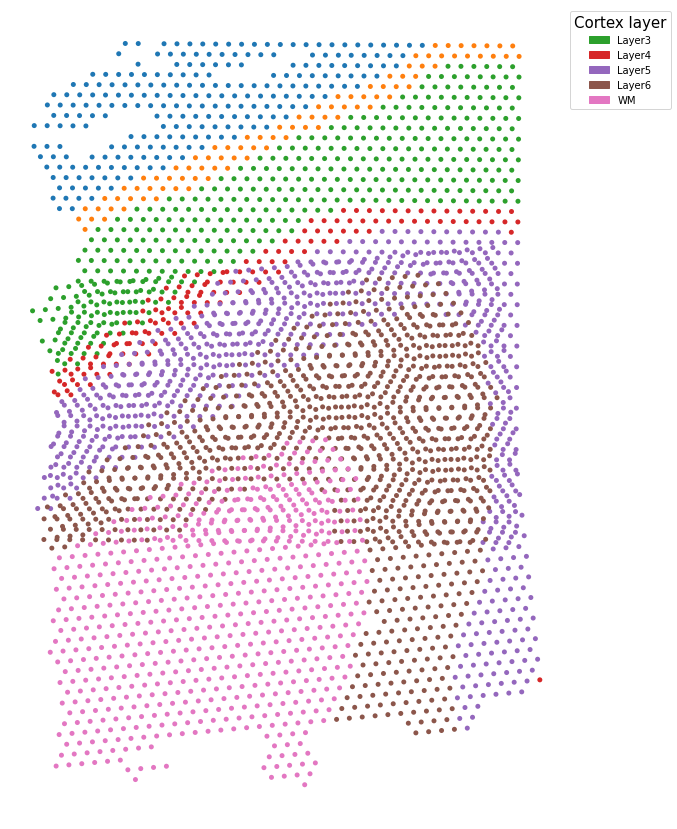

In [39]:
new_slices = partial_stack_slices_pairwise([sliceA, sliceB], [pi])
plot_slices_overlap(new_slices, layer_to_color_map)

In [24]:
real05_00_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/151673/151673_overlap0.5_dropFalse_rotateFalse_resampleFalse_delta0.0_row0_col0.h5ad'
real05_01_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/151674/151674_overlap0.5_dropFalse_rotateFalse_resampleFalse_delta0.0_row0_col1.h5ad'

real05_00 = sc.read_h5ad(real05_00_filename)
real05_01 = sc.read_h5ad(real05_01_filename)
# real05_0001_pi, log = partial_pairwise_align(real05_00, real05_01, alpha=0.1, m=0.7, armijo=False, dissimilarity='glmpca', norm=True, return_obj=True, verbose=True)
real05_0001_pi = pairwise_align(real05_00, real05_01, alpha=0.1, dissimilarity='kl', norm=True, verbose=True)
print("Total mass transported is: " + str(np.sum(real05_0001_pi)))
print("ARI is: " + str(compute_alignment_ari(real05_00, real05_01, real05_0001_pi)))

It.  |Loss        |Relative loss|Absolute loss
------------------------------------------------
    0|1.808397e+00|0.000000e+00|0.000000e+00
    1|1.670827e+00|8.233658e-02|1.375702e-01
    2|1.656348e+00|8.741385e-03|1.447878e-02
    3|1.652905e+00|2.082870e-03|3.442787e-03
    4|1.650606e+00|1.393185e-03|2.299600e-03
    5|1.650044e+00|3.403405e-04|5.615769e-04
    6|1.649973e+00|4.291672e-05|7.081145e-05
    7|1.649955e+00|1.089438e-05|1.797525e-05
    8|1.649949e+00|3.813486e-06|6.292058e-06
    9|1.649948e+00|9.298221e-07|1.534158e-06
   10|1.649947e+00|4.602731e-07|7.594263e-07
   11|1.649946e+00|3.270542e-07|5.396220e-07
   12|1.649946e+00|1.858234e-07|3.065986e-07
   13|1.649946e+00|6.336085e-08|1.045420e-07
   14|1.649946e+00|8.967965e-08|1.479666e-07
   15|1.649946e+00|1.611578e-07|2.659016e-07
   16|1.649945e+00|1.315376e-07|2.170298e-07
   17|1.649945e+00|9.942474e-08|1.640454e-07
   18|1.649945e+00|9.803035e-08|1.617447e-07
   19|1.649945e+00|1.859133e-07|3.067467e-07
It. 

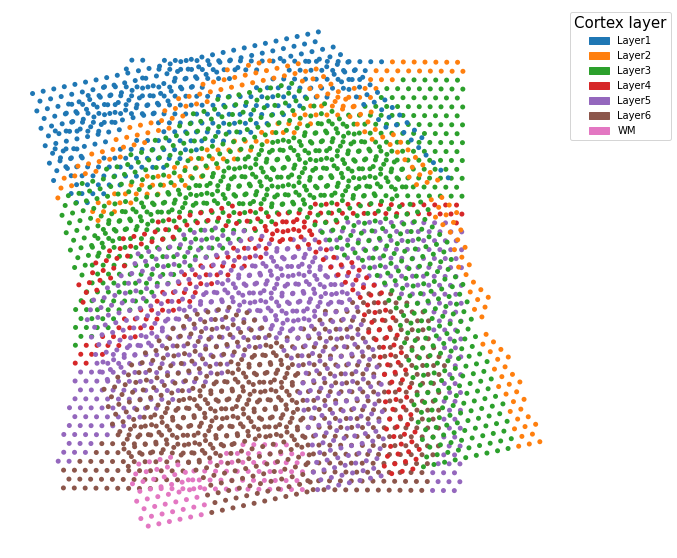

In [25]:
real_05_0001_newslices = partial_stack_slices_pairwise([real05_00, real05_01], [real05_0001_pi])
plot_slices_overlap(real_05_0001_newslices, layer_to_color_map)

In [34]:
real_151507_05_00_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/151507/151507_overlap0.5_dropFalse_rotateFalse_resampleFalse_delta0.0_row0_col0.h5ad'
real_151508_05_01_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/151508/151508_overlap0.5_dropFalse_rotateFalse_resampleFalse_delta0.0_row0_col1.h5ad'

real_151507_05_00 = sc.read_h5ad(real_151507_05_00_filename)
real_151508_05_01 = sc.read_h5ad(real_151508_05_01_filename)
real_15150708_05_0001_pi, log = partial_pairwise_align(real_151507_05_00, real_151508_05_01, alpha=0.1, m=0.5, armijo=False, dissimilarity='glmpca', norm=True, return_obj=True, verbose=True)
print("Total mass transported is: " + str(np.sum(real_15150708_05_0001_pi)))
print("ARI is: " + str(compute_alignment_ari(real_151507_05_00, real_151508_05_01, real_15150708_05_0001_pi)))

Starting GLM-PCA...
Iteration: 0 | deviance=7.8657E+6
Iteration: 1 | deviance=7.8657E+6
Iteration: 2 | deviance=7.5440E+6
Iteration: 3 | deviance=7.3241E+6
Iteration: 4 | deviance=7.2168E+6
Iteration: 5 | deviance=7.1604E+6
Iteration: 6 | deviance=7.1273E+6
Iteration: 7 | deviance=7.1052E+6
Iteration: 8 | deviance=7.0893E+6
Iteration: 9 | deviance=7.0768E+6
Iteration: 10 | deviance=7.0666E+6
Iteration: 11 | deviance=7.0581E+6
Iteration: 12 | deviance=7.0509E+6
Iteration: 13 | deviance=7.0447E+6
Iteration: 14 | deviance=7.0393E+6
Iteration: 15 | deviance=7.0345E+6
Iteration: 16 | deviance=7.0303E+6
Iteration: 17 | deviance=7.0266E+6
Iteration: 18 | deviance=7.0233E+6
Iteration: 19 | deviance=7.0202E+6
Iteration: 20 | deviance=7.0175E+6
Iteration: 21 | deviance=7.0150E+6
Iteration: 22 | deviance=7.0127E+6
Iteration: 23 | deviance=7.0106E+6
Iteration: 24 | deviance=7.0086E+6
Iteration: 25 | deviance=7.0068E+6
Iteration: 26 | deviance=7.0052E+6
Iteration: 27 | deviance=7.0036E+6
Iteration:

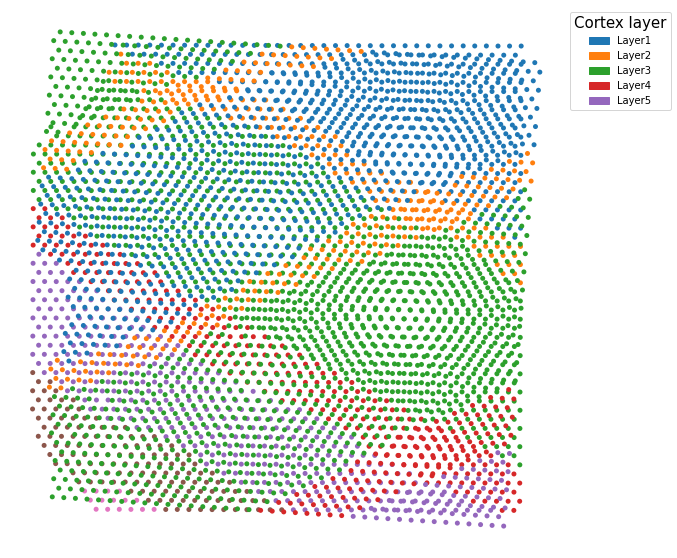

In [35]:
real_15150708_05_0001_newslices = partial_stack_slices_pairwise([real_151507_05_00, real_151508_05_01], [real_15150708_05_0001_pi])
plot_slices_overlap(real_15150708_05_0001_newslices, layer_to_color_map)

In [6]:
real_151507_05_00_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/151507/151507_overlap0.5_dropFalse_rotateFalse_resampleFalse_delta0.0_row0_col0.h5ad'
real_151508_05_10_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/151508/151508_overlap0.5_dropFalse_rotateFalse_resampleFalse_delta0.0_row1_col0.h5ad'

real_151507_05_00 = sc.read_h5ad(real_151507_05_00_filename)
real_151508_05_10 = sc.read_h5ad(real_151508_05_10_filename)
real_15150708_05_0010_pi, log = partial_pairwise_align(real_151507_05_00, real_151508_05_10, alpha=0.1, m=0.5, armijo=False, dissimilarity='glmpca', norm=True, return_obj=True, verbose=True)
print("Total mass transported is: " + str(np.sum(real_15150708_05_0010_pi)))

Starting GLM-PCA...
Iteration: 0 | deviance=7.4931E+6
Iteration: 1 | deviance=7.4930E+6
Iteration: 2 | deviance=7.1872E+6
Iteration: 3 | deviance=6.9814E+6
Iteration: 4 | deviance=6.8792E+6
Iteration: 5 | deviance=6.8255E+6
Iteration: 6 | deviance=6.7948E+6
Iteration: 7 | deviance=6.7744E+6
Iteration: 8 | deviance=6.7595E+6
Iteration: 9 | deviance=6.7479E+6
Iteration: 10 | deviance=6.7384E+6
Iteration: 11 | deviance=6.7304E+6
Iteration: 12 | deviance=6.7237E+6
Iteration: 13 | deviance=6.7178E+6
Iteration: 14 | deviance=6.7127E+6
Iteration: 15 | deviance=6.7081E+6
Iteration: 16 | deviance=6.7041E+6
Iteration: 17 | deviance=6.7004E+6
Iteration: 18 | deviance=6.6971E+6
Iteration: 19 | deviance=6.6941E+6
Iteration: 20 | deviance=6.6913E+6
Iteration: 21 | deviance=6.6887E+6
Iteration: 22 | deviance=6.6863E+6
Iteration: 23 | deviance=6.6841E+6
Iteration: 24 | deviance=6.6820E+6
Iteration: 25 | deviance=6.6801E+6
Iteration: 26 | deviance=6.6782E+6
Iteration: 27 | deviance=6.6765E+6
Iteration:

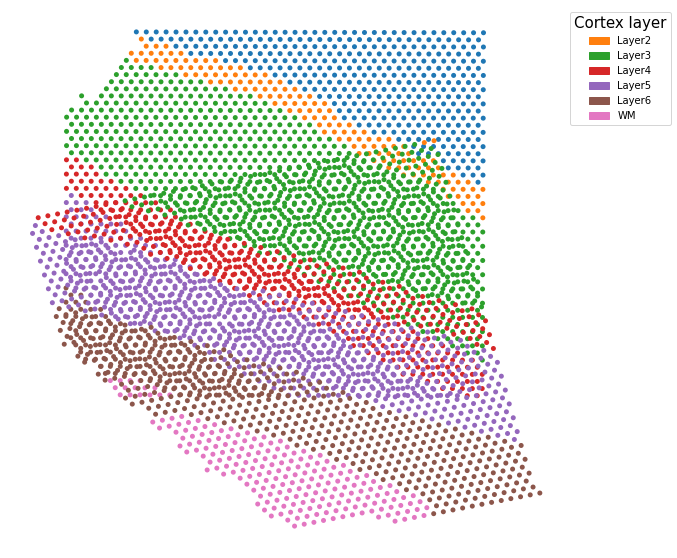

In [7]:
real_15150708_05_0010_newslices = partial_stack_slices_pairwise([real_151507_05_00, real_151508_05_10], [real_15150708_05_0010_pi])
plot_slices_overlap(real_15150708_05_0010_newslices, layer_to_color_map)

In [14]:
real_151507_05_10_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/151507/151507_overlap0.5_dropFalse_rotateFalse_resampleFalse_delta0.0_row1_col0.h5ad'
real_151508_05_11_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/151508/151508_overlap0.5_dropFalse_rotateFalse_resampleFalse_delta0.0_row1_col1.h5ad'

real_151507_05_10 = sc.read_h5ad(real_151507_05_10_filename)
real_151508_05_11 = sc.read_h5ad(real_151508_05_11_filename)
real_15150708_05_1011_pi, log = partial_pairwise_align(real_151507_05_10, real_151508_05_11, alpha=0.1, m=0.5, armijo=False, dissimilarity='glmpca', norm=True, return_obj=True, verbose=True)
print("Total mass transported is: " + str(np.sum(real_15150708_05_1011_pi)))

Starting GLM-PCA...
Iteration: 0 | deviance=7.2191E+6
Iteration: 1 | deviance=7.2190E+6
Iteration: 2 | deviance=6.8983E+6
Iteration: 3 | deviance=6.6845E+6
Iteration: 4 | deviance=6.5811E+6
Iteration: 5 | deviance=6.5294E+6
Iteration: 6 | deviance=6.4992E+6
Iteration: 7 | deviance=6.4791E+6
Iteration: 8 | deviance=6.4643E+6
Iteration: 9 | deviance=6.4528E+6
Iteration: 10 | deviance=6.4435E+6
Iteration: 11 | deviance=6.4358E+6
Iteration: 12 | deviance=6.4293E+6
Iteration: 13 | deviance=6.4236E+6
Iteration: 14 | deviance=6.4187E+6
Iteration: 15 | deviance=6.4143E+6
Iteration: 16 | deviance=6.4105E+6
Iteration: 17 | deviance=6.4070E+6
Iteration: 18 | deviance=6.4039E+6
Iteration: 19 | deviance=6.4011E+6
Iteration: 20 | deviance=6.3985E+6
Iteration: 21 | deviance=6.3962E+6
Iteration: 22 | deviance=6.3941E+6
Iteration: 23 | deviance=6.3921E+6
Iteration: 24 | deviance=6.3904E+6
Iteration: 25 | deviance=6.3887E+6
Iteration: 26 | deviance=6.3872E+6
Iteration: 27 | deviance=6.3858E+6
Iteration:

  147|9.208974e+00|4.832092e-06|4.449861e-05
  148|9.208958e+00|1.665465e-06|1.533720e-05
  149|9.208955e+00|3.613351e-07|3.327518e-06
  150|9.208949e+00|6.062619e-07|5.583035e-06
  151|9.208944e+00|6.220757e-07|5.728660e-06
  152|9.208939e+00|4.566149e-07|4.204939e-06
  153|9.208932e+00|7.783280e-07|7.167570e-06
  154|9.208930e+00|2.431706e-07|2.239341e-06
  155|9.208930e+00|1.209990e-08|1.114272e-07
 1000|9.208930e+00|0.000000e+00|0.000000e+00
Total mass transported is: 0.49999999999999534


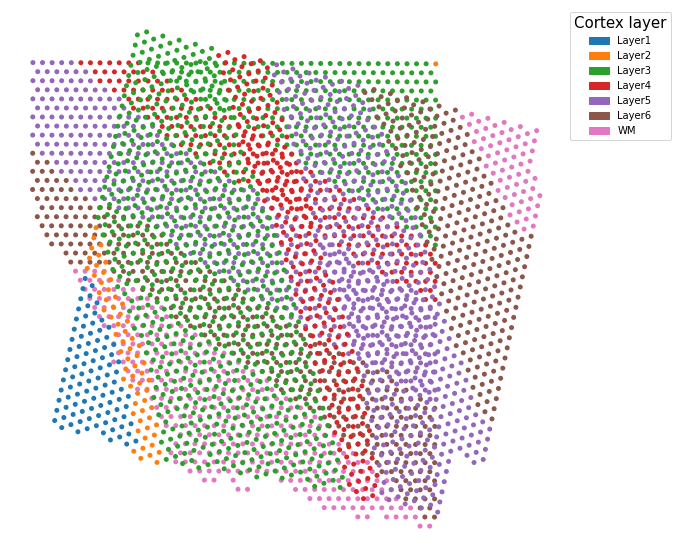

In [15]:
real_15150708_05_1011_newslices = partial_stack_slices_pairwise([real_151507_05_10, real_151508_05_11], [real_15150708_05_1011_pi])
plot_slices_overlap(real_15150708_05_1011_newslices, layer_to_color_map)

In [44]:
real_151507_05_10_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/151507/151507_overlap0.5_dropFalse_rotateFalse_resampleFalse_delta0.0_row1_col0.h5ad'
real_151508_05_11_filename = '/Users/xinhaoliu/Desktop/Research/Code/st_overlap_sim/sim/151508/151508_overlap0.5_dropFalse_rotateFalse_resampleFalse_delta0.0_row1_col1.h5ad'

real_151507_05_10 = sc.read_h5ad(real_151507_05_10_filename)
real_151508_05_11 = sc.read_h5ad(real_151508_05_11_filename)
real_15150708_05_1011_pi, log = partial_pairwise_align(real_151507_05_10, real_151508_05_11, alpha=0.05, m=0.3, armijo=False, dissimilarity='glmpca', norm=True, return_obj=True, verbose=True)
print("Total mass transported is: " + str(np.sum(real_15150708_05_1011_pi)))
print("ARI is: " + str(compute_alignment_ari(real_151507_05_10, real_151508_05_11, real_15150708_05_1011_pi)))


Starting GLM-PCA...
Iteration: 0 | deviance=7.2191E+6
Iteration: 1 | deviance=7.2190E+6
Iteration: 2 | deviance=6.9005E+6
Iteration: 3 | deviance=6.6895E+6
Iteration: 4 | deviance=6.5876E+6
Iteration: 5 | deviance=6.5333E+6
Iteration: 6 | deviance=6.5014E+6
Iteration: 7 | deviance=6.4807E+6
Iteration: 8 | deviance=6.4659E+6
Iteration: 9 | deviance=6.4544E+6
Iteration: 10 | deviance=6.4451E+6
Iteration: 11 | deviance=6.4373E+6
Iteration: 12 | deviance=6.4308E+6
Iteration: 13 | deviance=6.4252E+6
Iteration: 14 | deviance=6.4204E+6
Iteration: 15 | deviance=6.4162E+6
Iteration: 16 | deviance=6.4125E+6
Iteration: 17 | deviance=6.4092E+6
Iteration: 18 | deviance=6.4062E+6
Iteration: 19 | deviance=6.4036E+6
Iteration: 20 | deviance=6.4011E+6
Iteration: 21 | deviance=6.3989E+6
Iteration: 22 | deviance=6.3969E+6
Iteration: 23 | deviance=6.3950E+6
Iteration: 24 | deviance=6.3932E+6
Iteration: 25 | deviance=6.3916E+6
Iteration: 26 | deviance=6.3901E+6
Iteration: 27 | deviance=6.3887E+6
Iteration:

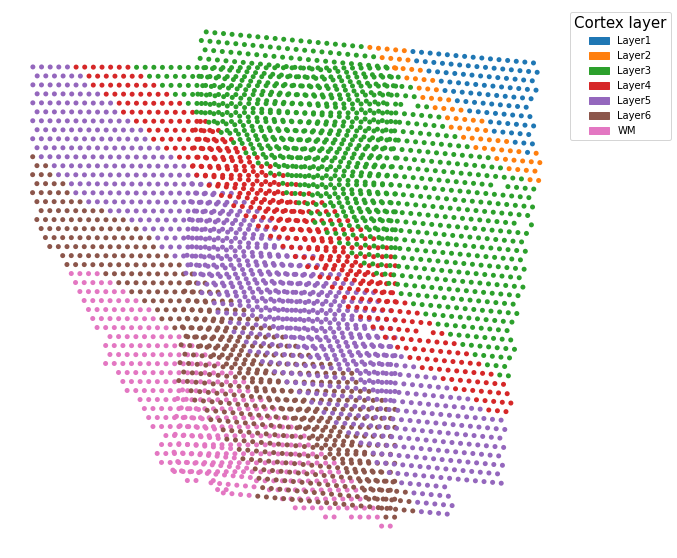

In [45]:
real_15150708_05_1011_newslices = partial_stack_slices_pairwise([real_151507_05_10, real_151508_05_11], [real_15150708_05_1011_pi])
plot_slices_overlap(real_15150708_05_1011_newslices, layer_to_color_map)


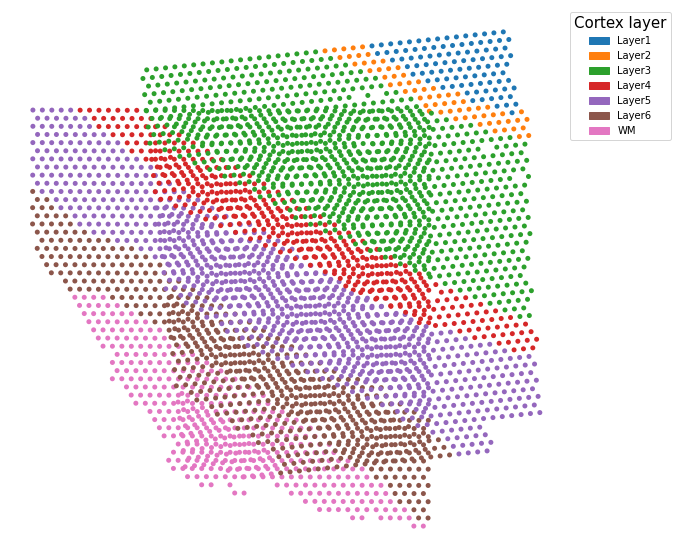

In [8]:
#alpha=0.1, m=0.3
real_15150708_05_1011_newslices = partial_stack_slices_pairwise([real_151507_05_10, real_151508_05_11], [real_15150708_05_1011_pi])
plot_slices_overlap(real_15150708_05_1011_newslices, layer_to_color_map)

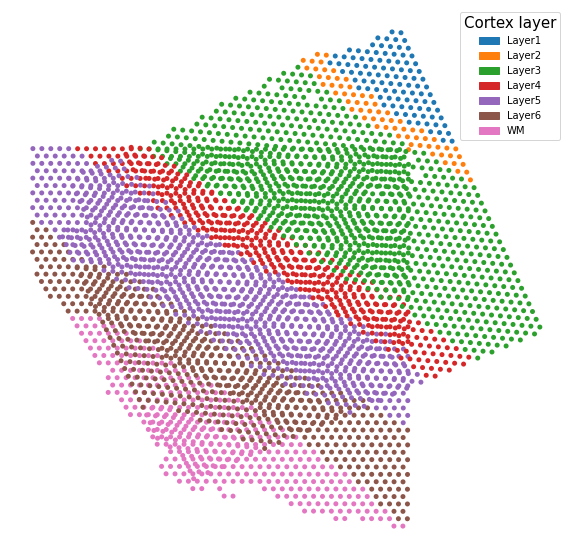

In [10]:
#alpha=0.1, m=0.3
real_15150708_05_1011_newslices = partial_stack_slices_pairwise([real_151507_05_10, real_151508_05_11], [real_15150708_05_1011_pi])
plot_slices_overlap(real_15150708_05_1011_newslices, layer_to_color_map)